# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import airfoils data

In [2]:
df = pd.read_csv('Airfoil.csv')
df.drop(['upper0.75c', 'lower0.75c', 'AoF_Cl0.5'], axis=1, inplace=True)
df.sample(5)

,Airfoils,t0.75c,Cd,Cl/Cd
146,NACA M24,0.068897,0.01671,29.922202
21,NACA 63-206,0.026840,0.01011,49.455984
50,NACA 65-206,0.031880,0.01026,48.732943
135,EPPLER 858,0.086440,0.01118,44.722719
89,NACA 0010,0.052400,0.01299,38.491147


# Scaler processing

In [3]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [4]:
cols = ['t0.75c', 'Cd', 'Cl/Cd']

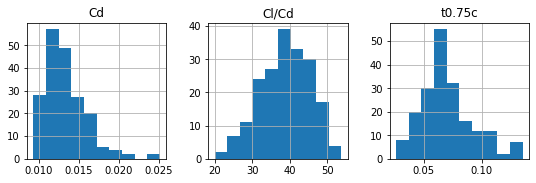

In [5]:
df[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols),2.5));

In [6]:
scaler = preprocessing.PowerTransformer(standardize=True)
S = scaler.fit_transform(df[cols])
S[:5]

array([[-0.83578211, -0.23485399,  0.21170231],
       [-0.32948228, -0.19339815,  0.17074216],
       [ 0.32569592,  0.36453259, -0.37220145],
       [-1.27289825, -0.92403057,  0.90990085],
       [-0.82361619, -0.86052133,  0.8440273 ]])

In [7]:
X = pd.DataFrame(S, columns=cols)
X.head()

,t0.75c,Cd,Cl/Cd
0,-0.835782,-0.234854,0.211702
1,-0.329482,-0.193398,0.170742
2,0.325696,0.364533,-0.372201
3,-1.272898,-0.924031,0.909901
4,-0.823616,-0.860521,0.844027


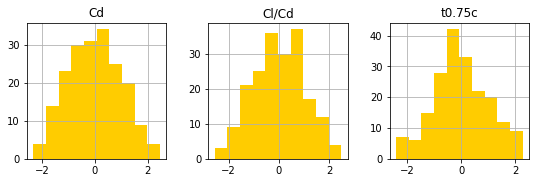

In [8]:
X[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols),2.5), color='#ffcc00');

# Used K means clustering algorithm (Machine Learning)

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [10]:
def sil_score(X, from_k=2, to_k=6):
    '''
    calculate silhouette score for k clusters
    '''
    sils=[]
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k)
        m.fit(X)
        # The silhouette_score gives the average value for all the samples
        silhouette_avg = silhouette_score(X, m.labels_).round(4)
        sils.append([silhouette_avg, k])
        
    return sils

This is function for calculate the number of cluster.

In [11]:
ss=sil_score(X, 2, 5)
print(f'scores = {ss}')
print(f'optimal number of clusters = {max(ss)[1]}')

scores = [[0.4772, 2], [0.3816, 3], [0.3514, 4], [0.3585, 5]]
optimal number of clusters = 2


If score is high that's mean it's good.
But we choose divide in 3 cluster, because it's expediently for analysis.

In [12]:
def silhouette_plot(X, from_k, to_k):
    sil_scores=[]
    for k in range(from_k, to_k + 1):
        # Instantiate the clustering model and visualizer
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X) # Fit the training data to the visualizer
        visualizer.poof() # Draw/show/poof the data
#         print(visualizer.silhouette_score_)
#         sil_scores.append([k, visualizer.silhouette_score_])
        sil_scores.append([visualizer.silhouette_score_, k])
    return sil_scores

This is function for plot the mean score cluster.

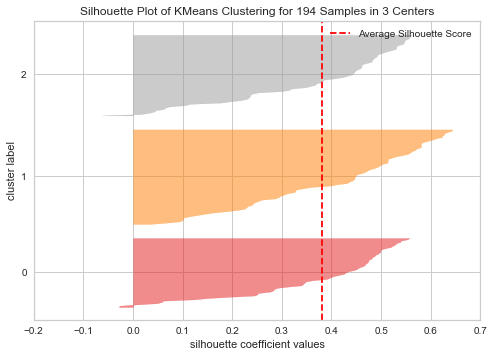

In [13]:
scores=silhouette_plot(X, 3, 3)

In [14]:
model = KMeans(n_clusters=3)

In [15]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
point = model.cluster_centers_
point

array([[-0.79522635, -1.09414976,  1.09683056],
       [ 1.01168643,  1.20138708, -1.1858663 ],
       [-0.04325773,  0.08407664, -0.09819412]])

In [17]:
X['cluster'] = model.labels_

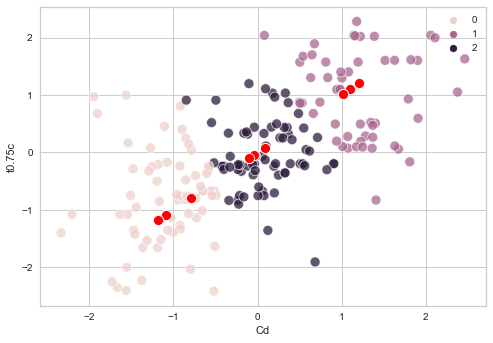

In [32]:
sns.scatterplot(x=X['Cd'], y=X['t0.75c'], s=100, hue=X['cluster'], alpha=0.75)
for i in range(3):
    sns.scatterplot(x=point[i], y=point[i], s=100, color='red')
    sns.scatterplot(x=point[i], y=point[i], s=100, color='red')
    sns.scatterplot(x=point[i], y=point[i], s=100, color='red')

In [19]:
model.labels_

array([2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0,
       0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1,
       1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1,
       0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1,
       0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2])

Cluster was divide in 3 as 0, 1, 2.

In [20]:
df['cluster']=model.labels_
df.head()

,Airfoils,t0.75c,Cd,Cl/Cd,cluster
0,NACA 63A010,0.05090,0.01236,40.453074,2
1,NACA 63012A,0.06052,0.01244,40.192926,2
2,NACA 63-015A,0.07462,0.01364,36.656892,2
3,NACA 63-210,0.04332,0.01117,44.762757,0
4,NACA 63-212,0.05112,0.01127,44.365572,0


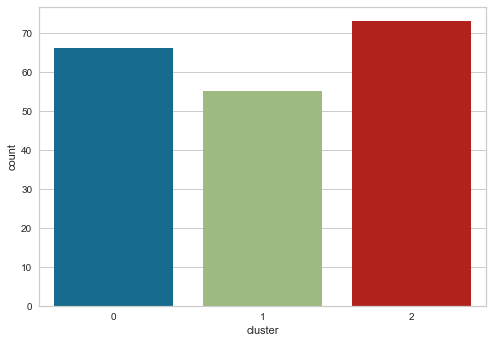

In [21]:
sns.countplot(x='cluster', data=df);

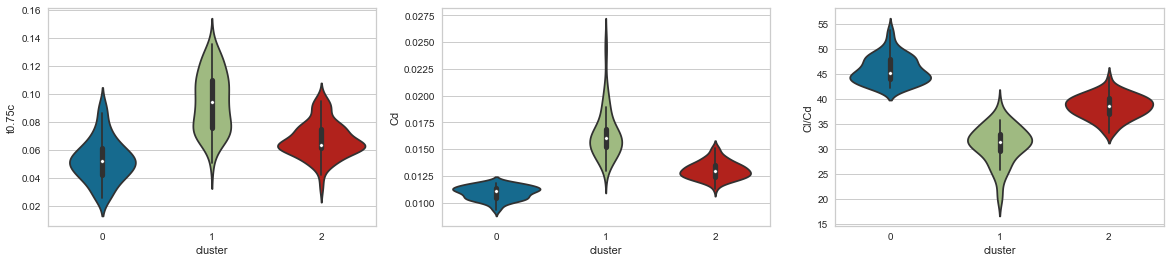

In [22]:
cols = ['t0.75c', 'Cd', 'Cl/Cd']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df, ax=ax[i])

In [23]:
dx=X
dx['cluster']=model.labels_
dx.head()

,t0.75c,Cd,Cl/Cd,cluster
0,-0.835782,-0.234854,0.211702,2
1,-0.329482,-0.193398,0.170742,2
2,0.325696,0.364533,-0.372201,2
3,-1.272898,-0.924031,0.909901,0
4,-0.823616,-0.860521,0.844027,0


In [24]:
dx.groupby('cluster').median()

,t0.75c,Cd,Cl/Cd
cluster,,,
0,-0.759969,-0.982184,0.970541
1,1.093808,1.176513,-1.150768
2,-0.197421,0.076658,-0.093793


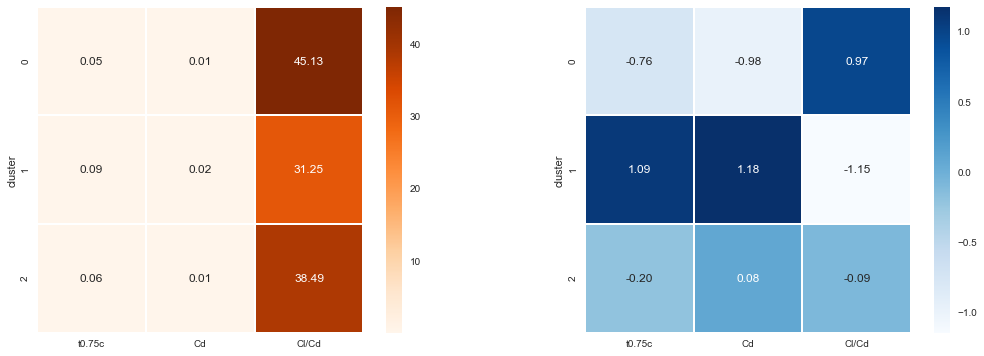

In [33]:
cols = ['t0.75c', 'Cd', 'Cl/Cd', 'cluster']
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))
ax=ax.ravel()
sns.heatmap(df[cols].groupby('cluster').median(), cmap="Oranges", linewidths=1, 
            square=True, annot=True, fmt='.2f',ax=ax[0]);
sns.heatmap(dx[cols].groupby('cluster').median(), cmap="Blues", linewidths=1, 
            square=True, annot=True, fmt='.2f', ax=ax[1]);

For compare before scaling and after scaling.

In [26]:
df.groupby('cluster').head(3).sort_values('cluster')

,Airfoils,t0.75c,Cd,Cl/Cd,cluster
3,NACA 63-210,0.04332,0.01117,44.762757,0
4,NACA 63-212,0.05112,0.01127,44.365572,0
7,NACA 63-412,0.05108,0.01113,44.923630,0
20,NACA 66-021,0.12502,0.01682,29.726516,1
29,NACA 63(4)-221,0.08318,0.01440,34.722222,1
42,NACA 64(4)-221,0.08830,0.01462,34.199726,1
0,NACA 63A010,0.05090,0.01236,40.453074,2
1,NACA 63012A,0.06052,0.01244,40.192926,2
2,NACA 63-015A,0.07462,0.01364,36.656892,2


In [27]:
df_cluster_0 = df[df.cluster==0]
df_cluster_1 = df[df.cluster==1]
df_cluster_2 = df[df.cluster==2]
df_cluster_1.head()

,Airfoils,t0.75c,Cd,Cl/Cd,cluster
20,NACA 66-021,0.12502,0.01682,29.726516,1
29,NACA 63(4)-221,0.08318,0.01440,34.722222,1
42,NACA 64(4)-221,0.08830,0.01462,34.199726,1
43,NACA 64(4)-421,0.08826,0.01397,35.790981,1
56,NACA 65(3)-218,0.08790,0.01405,35.587189,1


# Save to file after finish

In [28]:
# df.to_csv('AirfoilsCluster.csv', index=False)

In [29]:
# df_cluster_0.to_csv('airfoil_cluster_0.csv', index=False)
# df_cluster_1.to_csv('airfoil_cluster_1.csv', index=False)
# df_cluster_2.to_csv('airfoil_cluster_2.csv', index=False)